# [Introduction to Data Science: A Comp-Math-Stat Approach](http://datascience-intro.github.io/1MS041-2021/)    
## 1MS041, 2021 
&copy;2021 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 06. Data and Statistics: New Zealand Earthquakes, 2018 Swedish National Election and Pubs in Open Street Maps of DL & SE


- Live Data-fetch of NZ EQ Data
- More on Statistics
- Sample Mean
- Sample Variance
- Order Statistics
- Frequencies
- Empirical Mass Function
- Empirical Distribution Function
- List Comprehensions
- New Zealand Earthquakes
- Live Play with `data/`
  - Swedish election data
  - Biergartens in Germany and Pubs in Sweden

## Earthquakes

Here is an extract from [https://en.wikipedia.org/wiki/Earthquake](https://en.wikipedia.org/wiki/Earthquake):

> An earthquake (also known as a quake, tremor or temblor) is the shaking of the surface of the Earth resulting from a sudden release of energy in the Earth's lithosphere that creates seismic waves. Earthquakes can range in size from those that are so weak that they cannot be felt to those violent enough to propel objects and people into the air, and wreak destruction across entire cities. The seismicity, or seismic activity, of an area is the frequency, type, and size of earthquakes experienced over a period of time. The word tremor is also used for non-earthquake seismic rumbling.

> At the Earth's surface, earthquakes manifest themselves by shaking and displacing or disrupting the ground. When the epicenter of a large earthquake is located offshore, the seabed may be displaced sufficiently to cause a tsunami. Earthquakes can also trigger landslides and, occasionally, volcanic activity.

> In its most general sense, the word earthquake is used to describe any seismic event—whether natural or caused by humans—that generates seismic waves. Earthquakes are caused mostly by rupture of geological faults but also by other events such as volcanic activity, landslides, mine blasts, and nuclear tests. An earthquake's point of initial rupture is called its hypocenter or focus. The **epicenter** is the point at ground level directly above the hypocenter.


Having gotten some basic background on earthquakes (Seismologists are the domain experts of [seismology](https://en.wikipedia.org/wiki/Seismology) or the study of earthquakes) as we will be analysing data fetched from New Zealand which is in the *Ring of Fire* along with Japan, Western American continental coastlines all the way down to Chile as rendered below.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/Pacific_Ring_of_Fire.svg/465px-Pacific_Ring_of_Fire.svg.png)

Here are typical epicentres all across the globe.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Quake_epicenters_1963-98.png/450px-Quake_epicenters_1963-98.png)

In [28]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame 
    return IFrame(url, width='95%', height=ht) 
showURL('https://en.wikipedia.org/wiki/Earthquake',500)

To make the ideas sink in the following blogpost on [a review of probability theory](https://terrytao.wordpress.com/2010/01/01/254a-notes-0-a-review-of-probability-theory/) by one of the best mathematicians alive, namely [Terry Tao](https://en.wikipedia.org/wiki/Terence_Tao), is highly recommended, especially for students of Mathematics.

In [35]:
showURL('https://terrytao.wordpress.com/2010/01/01/254a-notes-0-a-review-of-probability-theory/')

## Live Data-fetching Exercise Now

Go to [https://quakesearch.geonet.org.nz/](https://quakesearch.geonet.org.nz/) and download data on NZ earthquakes.

<img src = "images/GeoNetQuakeSearchDownloadCSV.png" width =800>

In my attempt above to zoom out to include both islands of New Zealand (NZ) and get one year of data using the `Last Year` button choice from this site:
 - [https://quakesearch.geonet.org.nz/](https://quakesearch.geonet.org.nz/)
and hitting `Search` box gave the following URLs for downloading data. I used the `DOWNLOAD` button to get my own data in Output Format `CSV` as chosen earlier.

https://quakesearch.geonet.org.nz/csv?bbox=163.52051,-49.23912,182.19727,-32.36140&startdate=2017-06-01&enddate=2018-05-17T14:00:00
https://quakesearch.geonet.org.nz/csv?bbox=163.52051,-49.23912,182.19727,-32.36140&startdate=2017-5-17T13:00:00&enddate=2017-06-01

#### What should you do now?

Try to `DOWNLOAD` your own `CSV` data and store it in a file named **`my_earthquakes.csv`** (NOTE: rename the file when you download so you don't replace the file `earthquakes.csv`!) inside the folder named **`data`** that is inside the same directory that this notebook is in.

**Browser settings:** Make sure you have changed your browser settings so you get asked where a downloaded file should be saved each time you download.

In [2]:
%%sh
### print working directory
pwd

/home/user/datascience-intro/raaz/1MS041/master/jp


In [3]:
%%sh
#ls ## uncomment to `ls` or list contents of working directory

In [4]:
%%sh
### after download you should have the following file in directory named data
ls data

CORIS.csv
NYPowerBall.csv
co2_mm_mlo.txt
digits.csv
earthquakes.csv
earthquakes.csv.zip
earthquakes.tgz
earthquakes_small.csv
final.csv
final.csv.zip
final.tgz
leukemia.csv
portland.csv
pride_and_prejudice.txt
rainfallInChristchurch.csv
ratings.csv


In [5]:
%%sh  
### first three lines
head -3 data/earthquakes_small.csv

publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
2018p371534,,2018-05-18T11:13:48.826Z,2018-05-18T11:15:55.741Z,176.469659,-38.10063545,2.123583253,93.125,M,,NonLinLoc,,automatic,nz3drx,18,18,11,0.3996779802,94.08602902,1.036195008,0
2018p371524,,2018-05-18T11:08:07.588Z,2018-05-18T11:11:14.319Z,176.4213445,-38.63584892,2.570467678,35.9375,M,,NonLinLoc,,automatic,nz3drx,22,22,11,0.3208135882,89.12864378,1.012353739,0


In [6]:
%%sh 
### last three lines by `tail`
tail -3 data/earthquakes_small.csv

2018p352775,,2018-05-11T12:38:54.732Z,2018-05-11T12:40:28.518Z,175.6063627,-40.81585537,1.835272336,13.671875,M,,NonLinLoc,,automatic,nz3drx,22,22,12,0.1097369199,84.14006379,0.3314536834,0
2018p352725,,2018-05-11T12:12:36.343Z,2018-05-11T12:14:42.372Z,176.0372811,-38.78743116,2.103529946,76.25,M,,NonLinLoc,,automatic,nz3drx,17,17,4,0.4257033383,244.4056741,1.445270768,0
2018p352684,,2018-05-11T11:50:06.019Z,2018-05-11T11:51:41.163Z,176.5437111,-40.07042442,1.503468463,13.671875,M,,NonLinLoc,,automatic,nz3drx,13,13,7,0.079302248,81.46123042,0.4485324555,0


In [7]:
%%sh  
### number of lines in the file; mnemonic from `man wc` is wc = word-count option=-l is for lines
wc -l  data/earthquakes_small.csv

411 data/earthquakes_small.csv


In [8]:
#%%sh
#man wc

#### Let's analyse the measured earth quakes in `data/earthquakes.csv`

This will ensure we are all looking at the same file!

But feel free to play with your own `data/my_earthquakes.csv` on the side.

##### Exercise:
Grab lat, lon, magnitude

In [9]:
with open("data/earthquakes_small.csv") as f:
    reader = f.read()
    
dataList = reader.split('\n')

In [10]:
len(dataList)

412

In [11]:
dataList[0]

'publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty'

In [12]:
dataList[-1] ## Remember last line is empty

''

In [13]:
myDataAccumulatorList =[]
for data in dataList[1:-2]:
    dataRow = data.split(',')
    myData = [dataRow[4],dataRow[5],dataRow[6]]
    myFloatData = tuple([float(x) for x in myData])
    myDataAccumulatorList.append(myFloatData)

In [14]:
points(myDataAccumulatorList)

Graphics3d Object

### More on Data and Statistics

Recall that a statistic is any measurable function of the data: $T(x): \mathbb{X} \rightarrow \mathbb{T}$.

Thus, a statistic $T$ is also an RV that takes values in the measurable space $\mathbb{T}$.

When $x \in \mathbb{X}$ is the observed data, $T(x)=t$ is the observed statistic of the observed data $x$.

Can you imagine what actually $\Omega$ is for experiments or statistical models of earthquakes? In a nutshell one can say that $\Omega$ here is *everything that has been going on with planet earth...*. However, by limiting us to the data space $\mathbb{X}$ of the random variable $X$ we limit ourselves to the probability triple:

$$
(\Omega, \mathcal{F}_{\Omega},\mathbb{P}) \enspace,
$$

up to what is measurable by the data $X$

$$
(\mathbb{X}, \mathcal{F}_{\mathbb{X}},\mathbb{P}) \enspace,
$$

as induced by the triple $(\Omega, \mathcal{F}_{\Omega},\mathbb{P})$ through $X(\omega)$ and probability of any event $A$ in the sigma-algebra $\mathcal{F}_\mathbb{X}$, i.e., 

$$
\mathbb{P}(A) := \mathbb{P} \{\omega \in \Omega: X^{[-1]}(A) \in \mathcal{F}_{\Omega} \}, \quad \forall A \in \mathcal{F}_{\mathbb{X}} \enspace.
$$

Thus, we can leave $\Omega$ and $\mathcal{F}_{\Omega}$ to be "abstract" and focus on what we can actually measure, i.e., the data $X$ with data space $\mathbb{X}$ and its sigma algebra $\mathcal{F}_\mathbb{X}$. This approach allows $(\mathbb{X}, \mathcal{F}_{\mathbb{X}},\mathbb{P})$ to even evolve over time as we make progress in instrumentation (to observe more) and refine our statistical models to evolve $\mathbb{P}$ appropriately for the possibly refined sigma algebra.

A sequence of such refinements where the data space and the sigma algebras of what is measurable improves we think of the following sequence:

$$
(\mathbb{X}_1, \mathcal{F}_{\mathbb{X}_1},\mathbb{P}_1), (\mathbb{X}_2, \mathcal{F}_{\mathbb{X}_2},\mathbb{P}_2), \ldots
$$

This is a simple way to understand how two or more experimenters (scientists, engineers, decision-makers in an organisation) may have different statistical models as they have different data spaces. Natural implications on the assumptions the inverse maps $X_1^{[-1]}, X_1^{[-1]}, \ldots$ into $(\Omega, \mathcal{F}_{\Omega},\mathbb{P}_{[\cdot]})$ take, simply follow from the axiomatic logical language of probability theory.

Clearly, all of this matters as we are interested in making decisions (classification, estimation, hypothesis testing, etc.) that aid us in taking actions through appropriate statistics $T$ of the data $X$ which is merely another measurable mapping from

$$
(\mathbb{X}, \mathcal{F}_{\mathbb{X}},\mathbb{P}) \quad \text{to} \quad (\mathbb{T}, \mathcal{F}_{\mathbb{T}},\mathbb{P}) \enspace.
$$

We generally assume that $\mathcal{F}_{\mathbb{X}}$ and $\mathcal{F}_{\mathbb{T}$ are Borel sigma algebras generated 
by [Borel set](https://en.wikipedia.org/wiki/Borel_set)s in topological spaces $\mathbb{X}$ and $\mathbb{T}$, respectively. Recall:

> In mathematics, a Borel set is any set in a topological space that can be formed from open sets (or, equivalently, from closed sets) through the operations of countable union, countable intersection, and relative complement. Borel sets are named after Émile Borel.

> For a topological space X, the collection of all Borel sets on X forms a σ-algebra, known as the Borel algebra or Borel σ-algebra. The Borel algebra on X is the smallest σ-algebra containing all open sets (or, equivalently, all closed sets).

> Borel sets are important in measure theory, since any measure defined on the open sets of a space, or on the closed sets of a space, must also be defined on all Borel sets of that space. Any measure defined on the Borel sets is called a Borel measure.

In [34]:
showURL('https://en.wikipedia.org/wiki/Borel_set')

### Let's Play Live with other datasets, shall we?

### Swedish 2018 National Election Data



#### Swedish Election Outcomes 2018

See: [http://www.lamastex.org/datasets/public/elections/2018/sv/README](http://www.lamastex.org/datasets/public/elections/2018/sv/README)!

This was obtained by processing using the scripts at:

- https://gitlab.com/tilo.wiklund/swedis-election-data-scraping

You already have this dataset in your `/data` directory.

In [15]:
%%sh
cd data
### if you don't see final.csv in data/ below
### then either uncomment and try the next line in linux/Mac OSX
#tar -zxvf final.tgz
### or try the next line after uncommenting it to extract final.csv
### unzip final.csv.zip
ls -al

total 10258
drwxr-xr-x  2 user user      18 Sep 16 14:48 .
drwxr-xr-x 20 user user      73 Oct  5 06:49 ..
-rw-r--r--  1 user user   22701 Feb 12  2021 CORIS.csv
-rw-r--r--  1 user user   29002 Sep 16 14:52 NYPowerBall.csv
-rw-r--r--  1 user user   50555 Feb 12  2021 co2_mm_mlo.txt
-rw-r--r--  1 user user  495375 Feb 12  2021 digits.csv
-rw-r--r--  1 user user 4085555 Feb 12  2021 earthquakes.csv
-rw-r--r--  1 user user 1344114 Feb 12  2021 earthquakes.csv.zip
-rw-r--r--  1 user user 1344959 Feb 12  2021 earthquakes.tgz
-rw-r--r--  1 user user   77786 Feb 12  2021 earthquakes_small.csv
-rw-r--r--  1 user user 4894689 Nov  9  2018 final.csv
-rw-r--r--  1 user user  467572 Feb 12  2021 final.csv.zip
-rw-r--r--  1 user user  467611 Feb 12  2021 final.tgz
-rw-r--r--  1 user user 2185909 Feb 12  2021 leukemia.csv
-rw-r--r--  1 user user     730 Feb 12  2021 portland.csv
-rw-r--r--  1 user user  724725 Feb 12  2021 pride_and_prejudice.txt
-rw-r--r--  1 user user  376954 Feb 12  2021 rainfall

In [16]:
%%sh
wc data/final.csv
head data/final.csv

  82226  461865 4894689 data/final.csv
region,municipality,district,party,votes
Blekinge län,Karlshamn,0 - Centrala Asarum,S,519
Blekinge län,Karlshamn,0 - Centrala Asarum,SD,311
Blekinge län,Karlshamn,0 - Centrala Asarum,M,162
Blekinge län,Karlshamn,0 - Centrala Asarum,V,82
Blekinge län,Karlshamn,0 - Centrala Asarum,KD,53
Blekinge län,Karlshamn,0 - Centrala Asarum,C,37
Blekinge län,Karlshamn,0 - Centrala Asarum,L,37
Blekinge län,Karlshamn,0 - Centrala Asarum,MP,32
Blekinge län,Karlshamn,0 - Centrala Asarum,BLANK,13


#### Counting total votes per party
Let's quickly load the data using [`csv.reader`](https://docs.python.org/2/library/csv.html) and count the number of votes for each party over all of Sweden next.

In [17]:
import csv, sys

filename = 'data/final.csv'
linesAlreadyRead=0
partyVotesDict={}
with open(filename, 'r') as f:
    reader = csv.reader(f,delimiter=',',quotechar='"',)
    headers = next(reader) ## skip first line of header
    try:
        for row in reader:
            linesAlreadyRead+=1
            party=row[3] ## convert str to unicode
            votes=int(row[4])
            if party in partyVotesDict: ## the data value already exists as a key
                partyVotesDict[party] = partyVotesDict[party] + votes ## add 1 to the count
            else: ## the data value does not exist as a key value
                ## add a new key-value pair for this new data value, frequency 1
                partyVotesDict[party] = votes
    except csv.Error as e:
        sys.exit('file %s, line %d: %s' % (filename, reader.line_num, e))

print("lines read = ", linesAlreadyRead)

lines read =  82225


In [18]:
### fancy printing of non-ASCII string
for kv in partyVotesDict.items():
    print("party ",kv[0], "\thas a total of votes =\t", kv[1])

party  S 	has a total of votes =	 1830386
party  SD 	has a total of votes =	 1135627
party  M 	has a total of votes =	 1284698
party  V 	has a total of votes =	 518454
party  KD 	has a total of votes =	 409478
party  C 	has a total of votes =	 557500
party  L 	has a total of votes =	 355546
party  MP 	has a total of votes =	 285899
party  BLANK 	has a total of votes =	 53084
party  ÖVR 	has a total of votes =	 69472
party  FI 	has a total of votes =	 29665
party  OGEJ 	has a total of votes =	 2120
party  OG 	has a total of votes =	 3342


In [19]:
### let's sort by descending order of votes
for party in sorted(partyVotesDict, key=partyVotesDict.get, reverse=True):
  print(party, "\t", partyVotesDict[party])

S 	 1830386
M 	 1284698
SD 	 1135627
C 	 557500
V 	 518454
KD 	 409478
L 	 355546
MP 	 285899
ÖVR 	 69472
BLANK 	 53084
FI 	 29665
OG 	 3342
OGEJ 	 2120


In [20]:
### To get a dictionary back with the top K=3 most popular parties
top3PartiesDict={} ## make an empty dict
for party in sorted(partyVotesDict, key=partyVotesDict.get, reverse=True):
    top3PartiesDict[party]=partyVotesDict[party]
top3PartiesDict

{'S': 1830386,
 'M': 1284698,
 'SD': 1135627,
 'C': 557500,
 'V': 518454,
 'KD': 409478,
 'L': 355546,
 'MP': 285899,
 'ÖVR': 69472,
 'BLANK': 53084,
 'FI': 29665,
 'OG': 3342,
 'OGEJ': 2120}

## Geospatial adventures: Pubs in Open Street Maps of DL & SE

Say you want to visit some places of interest in Germany. This tutorial on [Open Street Map's Overpass API](https://janakiev.com/blog/openstreetmap-with-python-and-overpass-api/) shows you how to get the locations of `"amenity"="biergarten"` in Germany.

We may come back to [https://www.openstreetmap.org](https://www.openstreetmap.org) later. If we don't then you know where to go for openly available data for geospatial statistical analysis.

In [24]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="DE"][admin_level=2];
(node["amenity"="biergarten"](area);
 way["amenity"="biergarten"](area);
 rel["amenity"="biergarten"](area);
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

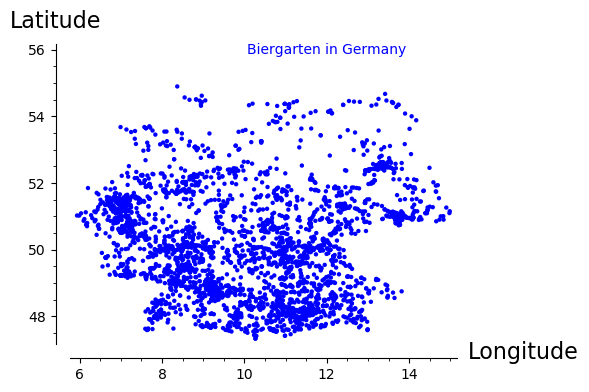

In [25]:
import numpy as np

### Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

### Convert coordinates into numpy array
X = np.array(coords)

p = points(zip(X[:, 0], X[:, 1]))
p += text('Biergarten in Germany',(12,56))
p.axes_labels(['Longitude','Latitude'])
#plt.axis('equal')
p.show()

#### Pubs in Sweden
With a minor modification to the above code we can view `amenity=pub` in Sweden.

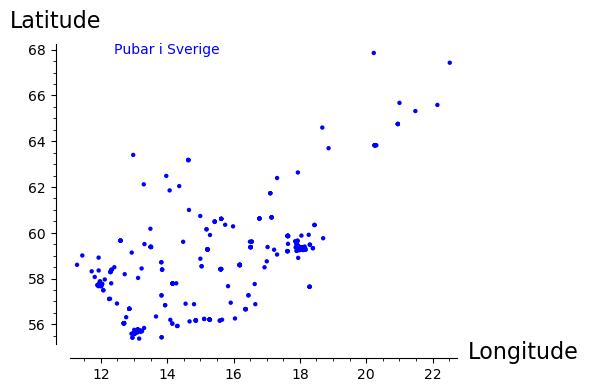

In [29]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="SE"][admin_level=2];
(node["amenity"="pub"](area);
 way["amenity"="pub"](area);
 rel["amenity"="pub"](area);
);
out center;
"""
response = requests.get(overpass_url, \
                        params={'data': overpass_query})
data = response.json()

import numpy as np

### Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

### Convert coordinates into numpy array
X = np.array(coords)

p = points(zip(X[:, 0], X[:, 1]))
p += text('Pubar i Sverige',(14,68))
p.axes_labels(['Longitude','Latitude'])
#plt.axis('equal')
p.show()